In [1]:
# Importing Data

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/Dom/Documents/Instacart Basket Analysis'

In [3]:
ords_prods_customers_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_ords_prods_merged.pkl'))

In [4]:
ords_prods_customers_merged.head()

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,195,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,195,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,195,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
ords_prods_customers_merged.columns

Index(['order_id', 'user_id', 'order_number', 'order_days_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0_y', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'busiest_day', 'Busiest_days', 'Busiest_period_of_day', 'max_order',
       'Loyalty_flag', 'average_price', 'Spending_flag', 'median_days',
       'frequency_flag', 'First Name', 'Last Name', 'Gender', 'State', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [6]:
ords_prods_customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                int64   
 2   order_number           int64   
 3   order_days_of_week     int64   
 4   order_hour_of_day      int64   
 5   days_since_last_order  float64 
 6   product_id             int64   
 7   add_to_cart_order      int64   
 8   reordered              int64   
 9   Unnamed: 0_y           int64   
 10  product_name           object  
 11  aisle_id               int64   
 12  department_id          int64   
 13  prices                 float64 
 14  _merge                 category
 15  price_range_loc        object  
 16  busiest_day            object  
 17  Busiest_days           object  
 18  Busiest_period_of_day  object  
 19  max_order              int64   
 20  Loyalty_flag           object  
 21  average_price          float6

In [7]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)
df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)


In [8]:
df_dep.head(21)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [9]:
df_dep['Veggie'] = ['Both', 'Both', 'Both', 'Both', 'Both', 'Both', 'Both', 'Both', 'Both', 'Both', 'Both',
                   'No', 'Both', 'Both', 'Both', 'Both', 'Both', 'Both', 'Both', 'No', 'Both']
df_dep['Alcohol'] = ['Does Not Drink', 'Does Not Drink', 'Does Not Drink', 'Does Not Drink', 'Yes', 'Does Not Drink', 'Does Not Drink', 'Does Not Drink', 'Does Not Drink', 'No', 'No', 'No', 'No', 'No',
                     'Does Not Drink', 'Does Not Drink', 'Does Not Drink', 'Does Not Drink', 'Does Not Drink', 'Does Not Drink', 'Does Not Drink']
df_dep['Kids'] = ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
                  'No', 'No', 'No', 'Yes', 'No', 'No', 'No']
df_dep['Pets'] = ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
                  'No', 'No', 'No', 'No', 'No', 'No', 'No']

In [10]:
df_dep.head(21)

,department_id,department,Veggie,Alcohol,Kids,Pets
0,1,frozen,Both,Does Not Drink,No,No
1,2,other,Both,Does Not Drink,No,No
2,3,bakery,Both,Does Not Drink,No,No
3,4,produce,Both,Does Not Drink,No,No
4,5,alcohol,Both,Yes,No,No
5,6,international,Both,Does Not Drink,No,No
6,7,beverages,Both,Does Not Drink,No,No
7,8,pets,Both,Does Not Drink,No,Yes
8,9,dry goods pasta,Both,Does Not Drink,No,No
9,10,bulk,Both,No,No,No


In [11]:
ords_prods_customers_merged = ords_prods_customers_merged.merge(df_dep, on='department_id', how='left')

In [12]:
ords_prods_customers_merged.head(10)

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,Age,date_joined,n_dependants,fam_status,income,department,Veggie,Alcohol,Kids,Pets
0,2539329,1,1,2,8,NaN,196,1,0,195,...,31,2/17/2019,3,married,40423,beverages,Both,Does Not Drink,No,No
1,2398795,1,2,3,7,15.0,196,1,1,195,...,31,2/17/2019,3,married,40423,beverages,Both,Does Not Drink,No,No
2,473747,1,3,3,12,21.0,196,1,1,195,...,31,2/17/2019,3,married,40423,beverages,Both,Does Not Drink,No,No
3,2254736,1,4,4,7,29.0,196,1,1,195,...,31,2/17/2019,3,married,40423,beverages,Both,Does Not Drink,No,No
4,431534,1,5,4,15,28.0,196,1,1,195,...,31,2/17/2019,3,married,40423,beverages,Both,Does Not Drink,No,No
5,3367565,1,6,2,7,19.0,196,1,1,195,...,31,2/17/2019,3,married,40423,beverages,Both,Does Not Drink,No,No
6,550135,1,7,1,9,20.0,196,1,1,195,...,31,2/17/2019,3,married,40423,beverages,Both,Does Not Drink,No,No
7,3108588,1,8,1,14,14.0,196,2,1,195,...,31,2/17/2019,3,married,40423,beverages,Both,Does Not Drink,No,No
8,2295261,1,9,1,16,0.0,196,4,1,195,...,31,2/17/2019,3,married,40423,beverages,Both,Does Not Drink,No,No
9,2550362,1,10,4,8,30.0,196,1,1,195,...,31,2/17/2019,3,married,40423,beverages,Both,Does Not Drink,No,No


# Because we have columns First Name and Last Name that can be traced back to a specific person we are dealing with PII so we must drop the columns

In [13]:
ords_prods_customers_merged = ords_prods_customers_merged.drop(columns = ['First Name', 'Last Name'])

In [14]:
ords_prods_customers_merged.columns

Index(['order_id', 'user_id', 'order_number', 'order_days_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0_y', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'busiest_day', 'Busiest_days', 'Busiest_period_of_day', 'max_order',
       'Loyalty_flag', 'average_price', 'Spending_flag', 'median_days',
       'frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'department', 'Veggie',
       'Alcohol', 'Kids', 'Pets'],
      dtype='object')

In [15]:
ords_prods_customers_merged['State'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [16]:
region = []

In [17]:
# Filling the list with regions "Northeast", "Midwest", "South" and "West"

for value in ords_prods_customers_merged['State']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [18]:
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [19]:
ords_prods_customers_merged['region'] = region

In [20]:
ords_prods_customers_merged['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

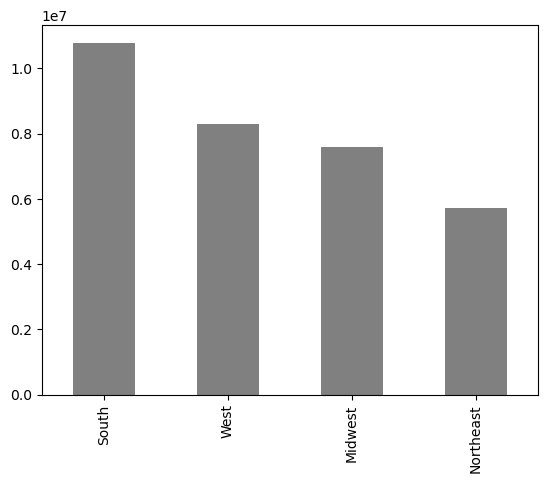

In [21]:
customer_by_region_bar = ords_prods_customers_merged['region'].value_counts().plot.bar(color ='grey')

In [22]:
customer_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_br_region_bar.png'))

In [23]:
ords_prods_customers_merged.head()

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,date_joined,n_dependants,fam_status,income,department,Veggie,Alcohol,Kids,Pets,region
0,2539329,1,1,2,8,NaN,196,1,0,195,...,2/17/2019,3,married,40423,beverages,Both,Does Not Drink,No,No,South
1,2398795,1,2,3,7,15.0,196,1,1,195,...,2/17/2019,3,married,40423,beverages,Both,Does Not Drink,No,No,South
2,473747,1,3,3,12,21.0,196,1,1,195,...,2/17/2019,3,married,40423,beverages,Both,Does Not Drink,No,No,South
3,2254736,1,4,4,7,29.0,196,1,1,195,...,2/17/2019,3,married,40423,beverages,Both,Does Not Drink,No,No,South
4,431534,1,5,4,15,28.0,196,1,1,195,...,2/17/2019,3,married,40423,beverages,Both,Does Not Drink,No,No,South


In [24]:
crosstab_region_spending_flag = pd.crosstab(ords_prods_customers_merged['region'], ords_prods_customers_merged['Spending_flag'], dropna = False)

In [25]:
crosstab_region_spending_flag

Spending_flag,High Spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


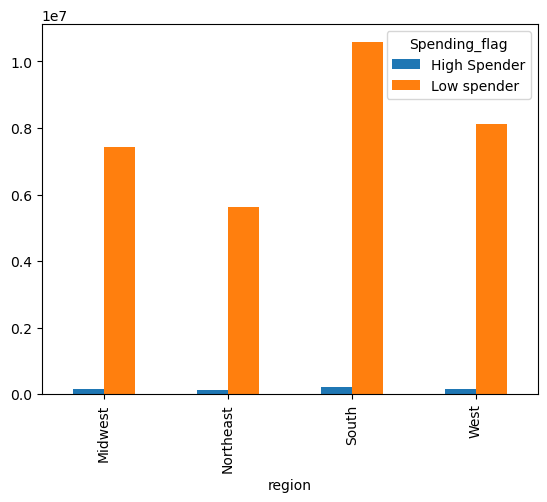

In [26]:
region_spending_bar = crosstab_region_spending_flag.plot.bar()

In [27]:
# Exporting the region_spending_bar

region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_bar.png'))

In [28]:
# Creating Exclusion Flag

ords_prods_customers_merged.loc[ords_prods_customers_merged['max_order'] < 5, 'Low_order_flag'] = 'Low-activity customer'

In [29]:
ords_prods_customers_merged.loc[ords_prods_customers_merged['max_order'] >= 5, 'Low_order_flag'] = 'High-activity customer'

In [30]:
ords_prods_customers_merged.head()

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,n_dependants,fam_status,income,department,Veggie,Alcohol,Kids,Pets,region,Low_order_flag
0,2539329,1,1,2,8,NaN,196,1,0,195,...,3,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer
1,2398795,1,2,3,7,15.0,196,1,1,195,...,3,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer
2,473747,1,3,3,12,21.0,196,1,1,195,...,3,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer
3,2254736,1,4,4,7,29.0,196,1,1,195,...,3,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer
4,431534,1,5,4,15,28.0,196,1,1,195,...,3,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer


In [31]:
ords_prods_customers_merged['Low_order_flag'].value_counts(dropna = False)

High-activity customer    30964564
Low-activity customer      1440295
Name: Low_order_flag, dtype: int64

In [32]:
# Creating a sample with high activity customers

high_activity_customer = ords_prods_customers_merged[ords_prods_customers_merged['Low_order_flag'] == 'High-activity customer']

In [33]:
high_activity_customer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_merged_high_activity.pkl'))

In [34]:
ords_prods_customers_merged.head()

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,n_dependants,fam_status,income,department,Veggie,Alcohol,Kids,Pets,region,Low_order_flag
0,2539329,1,1,2,8,NaN,196,1,0,195,...,3,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer
1,2398795,1,2,3,7,15.0,196,1,1,195,...,3,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer
2,473747,1,3,3,12,21.0,196,1,1,195,...,3,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer
3,2254736,1,4,4,7,29.0,196,1,1,195,...,3,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer
4,431534,1,5,4,15,28.0,196,1,1,195,...,3,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer


In [35]:
ords_prods_customers_merged.rename(columns = {'fam_status' : 'marital_status'}, inplace = True)

In [36]:
ords_prods_customers_merged.head()

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,n_dependants,marital_status,income,department,Veggie,Alcohol,Kids,Pets,region,Low_order_flag
0,2539329,1,1,2,8,NaN,196,1,0,195,...,3,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer
1,2398795,1,2,3,7,15.0,196,1,1,195,...,3,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer
2,473747,1,3,3,12,21.0,196,1,1,195,...,3,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer
3,2254736,1,4,4,7,29.0,196,1,1,195,...,3,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer
4,431534,1,5,4,15,28.0,196,1,1,195,...,3,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer


In [37]:
ords_prods_customers_merged.loc[ords_prods_customers_merged['Age'] < 13, 'Age_profile'] = 'Child'

In [38]:
ords_prods_customers_merged.loc[(ords_prods_customers_merged['Age'] >= 13) & (ords_prods_customers_merged['Age'] <= 17), 'Age_profile'] = 'Adolescent'

In [39]:
ords_prods_customers_merged.loc[(ords_prods_customers_merged['Age'] > 17) & (ords_prods_customers_merged['Age'] <= 35), 'Age_profile'] = 'Young Adult'

In [40]:
ords_prods_customers_merged.loc[(ords_prods_customers_merged['Age'] > 35) & (ords_prods_customers_merged['Age'] <= 65), 'Age_profile'] = 'Adult'

In [41]:
ords_prods_customers_merged.loc[ords_prods_customers_merged['Age'] > 65, 'Age_profile'] = 'Older Adult'

In [42]:
ords_prods_customers_merged.head()

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,marital_status,income,department,Veggie,Alcohol,Kids,Pets,region,Low_order_flag,Age_profile
0,2539329,1,1,2,8,NaN,196,1,0,195,...,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer,Young Adult
1,2398795,1,2,3,7,15.0,196,1,1,195,...,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer,Young Adult
2,473747,1,3,3,12,21.0,196,1,1,195,...,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer,Young Adult
3,2254736,1,4,4,7,29.0,196,1,1,195,...,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer,Young Adult
4,431534,1,5,4,15,28.0,196,1,1,195,...,married,40423,beverages,Both,Does Not Drink,No,No,South,High-activity customer,Young Adult


In [43]:
ords_prods_customers_merged['Age_profile'].value_counts()

Adult          15170339
Young Adult     9146419
Older Adult     8088101
Name: Age_profile, dtype: int64

In [44]:
ords_prods_customers_merged.shape

(32404859, 40)

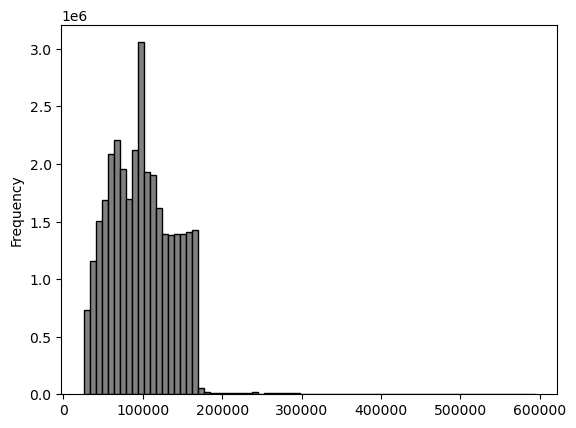

In [45]:
hist_customer_income = ords_prods_customers_merged['income'].plot.hist(bins = 75, color = 'grey', ec = 'black')

In [46]:
ords_prods_customers_merged.loc[ords_prods_customers_merged['income'] < 75000, 'income_profile'] = 'Low Income'

In [47]:
ords_prods_customers_merged.loc[(ords_prods_customers_merged['income'] >= 75000) & (ords_prods_customers_merged['income'] <= 125000), 'income_profile'] = 'Mid Income'

In [48]:
ords_prods_customers_merged.loc[ords_prods_customers_merged['income'] > 125000, 'income_profile'] = 'High Income'

In [49]:
ords_prods_customers_merged['income_profile'].value_counts(dropna = False)

Mid Income     13331136
Low Income     10442766
High Income     8630957
Name: income_profile, dtype: int64

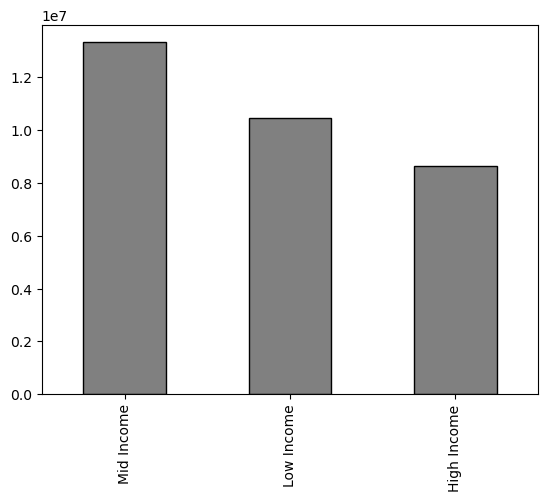

In [50]:
bar_income = ords_prods_customers_merged['income_profile'].value_counts().plot.bar(color = 'grey', ec = 'black')

In [51]:
bar_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile.png'))

In [52]:
crosstab_region_alcohol_flag = pd.crosstab(ords_prods_customers_merged['region'], ords_prods_customers_merged['Alcohol'], dropna = False)

In [53]:
crosstab_region_alcohol_flag.head()

Alcohol,Does Not Drink,No,Yes
region,,,
Midwest,6675416,885723,36186
Northeast,5033938,662256,26542
South,9485939,1254322,51624
West,7286396,967173,39344


# Department

In [54]:
# Creating a diet profile 
# Vegetarian diet excludes meat (all departments except 12)
# Vegan diet excludes meat and dairy products (all departments except 12 and 16)
# The rest follow Non-vegetarian diet

# Create a diet crosstab

department_user_crosstab = pd.crosstab(ords_prods_customers_merged['department_id'], ords_prods_customers_merged['user_id'], dropna = False)

KeyboardInterrupt: 

In [ ]:
department_user_crosstab.head()

In [ ]:
# Assigning diet flags and storing them in a dictionary

diet_dict = dict()
for user in department_user_crosstab:
    diet_list = department_user_crosstab[user].tolist()
    if diet_list[11] == 0 and diet_list[15] == 0:
        diet_dict[user] = 'Vegan'
    elif diet_list[11] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Non-vegetarian'

In [ ]:
# Assigning the flags to the list

diet_flag = []
for user in ords_prods_customers_merged['user_id']:
    diet_flag.append(diet_dict[user])

In [ ]:
# Adding the flag values to the df

ords_prods_customers_merged['diet'] = diet_flag

In [ ]:
ords_prods_customers_merged['diet'].value_counts(dropna = False)

In [ ]:
# Create a bar chart to visualize the diet profile

bar_diet_profile = ords_prods_customers_merged['diet'].value_counts().plot.bar(color = 'grey', ec = 'black')

In [ ]:
# Save the visualization as png

bar_diet_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_diet_profile.png'))

# Pet owners and no-pet owners I will use the Department_ID column (Department_ID = 8) to separate the customers into pet owners and no-pet owners.

In [ ]:
# Assigning pet flags to users and storing it in a dictionary

pet_dict = dict()
for user in department_user_crosstab:
    workinglist = department_user_crosstab[user].tolist()
    if workinglist[7] == 0:  # the index starts at 0, so index corresponds to Dep_ID=1
        pet_dict[user] = 'No-pet'
    else:
        pet_dict[user] = 'Pet owner'

In [ ]:
# Assigning user flags to the pet_flag

pet_flag = []
for user in ords_prods_customers_merged['user_id']:
    pet_flag.append(pet_dict[user])

In [ ]:
# Adding pet_flag column to the df

ords_prods_customers_merged['pet_status'] = pet_flag

In [ ]:
ords_prods_customers_merged['pet_status'].value_counts(dropna = False)

In [ ]:
# Create a bar chart to visualize the pet ownership profile

bar_pet_profile = ords_prods_customers_merged['pet_status'].value_counts().plot.bar(color = 'grey', ec = 'black')

In [ ]:
# Save the visualization as png

bar_pet_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pet_profile.png'))

In [ ]:
ords_prods_customers_merged['marital_status'].value_counts(dropna = False)b

In [ ]:
# Creating a family crosstab

family_crosstab = pd.crosstab(ords_prods_customers_merged['marital_status'], ords_prods_customers_merged['n_dependants'],  dropna = False)

In [ ]:
ords_prods_customers_merged.loc[ords_prods_customers_merged['n_dependants'] == 0, 'dependants'] = 'No dependants'

In [ ]:
ords_prods_customers_merged.loc[ords_prods_customers_merged['n_dependants'] >= 1, 'dependants'] = 'Has dependants'

In [ ]:
ords_prods_customers_merged['dependants'].value_counts(dropna = False)

In [ ]:
# Create a bar chart to visualize the dependants profile

bar_dependants_profile = ords_prods_customers_merged['dependants'].value_counts().plot.bar(color = 'grey', ec = 'black')

In [ ]:
 #Save the visualization as png

bar_dependants_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependants_profile.png'))

In [ ]:
# Alcohol consumption

alcohol_dict = dict()
for user in department_user_crosstab:
    working_list = department_user_crosstab[user].tolist()
    if working_list[4] == 0 :
        alcohol_dict[user] = 'Does Not Drink'
    else: 
        alcohol_dict[user] = 'Consumes alcohol'

In [ ]:
alcohol_flag = []
for user in ords_prods_customers_merged['user_id']:
    alcohol_flag.append(alcohol_dict[user])

In [ ]:
ords_prods_customers_merged['alcohol_consumption'] = alcohol_flag

In [ ]:
ords_prods_customers_merged['alcohol_consumption'].value_counts(dropna = False)

In [ ]:
# Create a bar chart to visualize the alcohol profile

bar_alcohol_profile = ords_prods_customers_merged['alcohol_consumption'].value_counts().plot.bar(color = 'grey', ec = 'black')

In [ ]:
ords_prods_customers_merged.loc[ords_prods_customers_merged['prices'] > 100, 'prices'] = np.nan

In [ ]:
# Step 7

ords_prods_customers_merged.groupby('Age_profile').agg({'days_since_last_order': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})

In [ ]:
ords_prods_customers_merged.groupby('income_profile').agg({'days_since_last_order': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})

In [ ]:
ords_prods_customers_merged.groupby('diet').agg({'days_since_last_order': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})

In [ ]:
ords_prods_customers_merged.groupby('pet_status').agg({'days_since_last_order': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})

In [ ]:
ords_prods_customers_merged.groupby('dependants').agg({'days_since_last_order': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})

In [ ]:
ords_prods_customers_merged.groupby('alcohol_consumption').agg({'days_since_last_order': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})

In [ ]:
# Step 8 customer profiles by region

cross_age_region = pd.crosstab(ords_prods_customers_merged['Age_profile'], ords_prods_customers_merged['region'], dropna = False, normalize = 'columns')

In [ ]:
cross_age_region

In [ ]:
bar_age_region = cross_age_region.plot.bar(ec = 'black')

In [ ]:
# Save the visualization as png

bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region.png'))

In [ ]:
# Create a crosstab to compare income profile and region

cross_income_region = pd.crosstab(ords_prods_customers_merged['income_profile'], ords_prods_customers_merged['region'], dropna = False, normalize = 'columns')

In [ ]:
cross_income_region

In [ ]:
bar_income_region = cross_income_region.plot.bar(ec = 'black')

In [ ]:
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region.png'))

In [ ]:
cross_diet_region = pd.crosstab(ords_prods_customers_merged['diet'], ords_prods_customers_merged['region'], dropna = False, normalize = 'columns')

In [ ]:
cross_diet_region

In [ ]:
bar_diet_region = cross_diet_region.plot.bar(ec = 'black')

In [ ]:
bar_diet_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_diet_region.png'))

In [ ]:
cross_pet_region = pd.crosstab(ords_prods_customers_merged['pet_status'], ords_prods_customers_merged['region'], dropna = False, normalize = 'columns')

In [ ]:
cross_pet_region

In [ ]:
bar_pet_region = cross_pet_region.plot.bar(ec = 'black')

In [ ]:
bar_pet_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pet_region.png'))

In [ ]:
cross_dependants_region = pd.crosstab(ords_prods_customers_merged['dependants'], ords_prods_customers_merged['region'], dropna = False, normalize = 'columns')

In [ ]:
cross_dependants_region

In [ ]:
bar_dependants_region = cross_dependants_region.plot.bar(ec = 'black')

In [ ]:
bar_dependants_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependants_region.png'))

In [ ]:
cross_alcohol_region = pd.crosstab(ords_prods_customers_merged['alcohol_consumption'], ords_prods_customers_merged['region'], dropna = False, normalize = 'columns')

In [ ]:
cross_alcohol_region

In [ ]:
bar_alcohol_region = cross_alcohol_region.plot.bar(ec = 'black')

In [ ]:
# Creating a cross tab between age and department 

cross_age_department = pd.crosstab(ords_prods_customers_merged['Age_profile'], ords_prods_customers_merged['department_id'], dropna = False, normalize = 'index')

In [ ]:
cross_age_department

## 1 - frozen; 2 - other: 3 - bakery; 4 - produce; 5 - alcohol; 6 - international; 7 - beverages; 8 - pets; 9 - dry goods pasta; 10 - bulk; 11 - personal care; 12 - meat/seafood; 13 - pantry; 14 - breakfast; 15 - canned goods; 16 - dairy/eggs; 17 - household; 18 - babies; 19 - snacks; 20 - deli; 21 - missing

In [ ]:
# Import department.csv

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [ ]:
df_dep

In [ ]:
# Rename Unamed as department_id
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)
df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

df_dep['Veggie'] = ['Both', 'Both', 'Both', 'Both', 'Both', 'Both', 'Both', 'Both', 'Both', 'Both', 'Both',
                   'No', 'Both', 'Both', 'Both', 'Both', 'Both', 'Both', 'Both', 'No', 'Both']
df_dep['Alcohol'] = ['No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
                     'No', 'No', 'No', 'No', 'No', 'No', 'No']
df_dep['Kids'] = ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
                  'No', 'No', 'No', 'Yes', 'No', 'No', 'No']
df_dep['Pets'] = ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
                  'No', 'No', 'No', 'No', 'No', 'No', 'No']




In [ ]:
dept_dict = dict(zip(df_dep["department_id"], df_dep["department"]))

In [ ]:
dept_dict

In [ ]:
# Create a column to add the department name to df

ords_prods_customers_merged['department'] = ords_prods_customers_merged['department_id'].map(dept_dict)

In [ ]:
ords_prods_customers_merged.head()

In [ ]:
# Creating a crosstab  for age and departments

cross_age_department = pd.crosstab(index = ords_prods_customers_merged['department'],
                                  columns = ords_prods_customers_merged['Age_profile'],
                                  normalize = 'index')

In [ ]:
cross_age_department

In [ ]:
bar_age_department = cross_age_department.plot.bar(stacked = True, ec = 'black')

In [ ]:
# Exporting age_department_bar

bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_department.png'))

In [ ]:
cross_income_department = pd.crosstab(index = ords_prods_customers_merged['department'],
                                     columns = ords_prods_customers_merged['income_profile'],
                                     normalize = 'index')

In [ ]:
cross_income_department

In [ ]:
bar_income_department = cross_income_department.plot.bar(stacked = True, ec = 'black')

In [ ]:
# Exporting income_department_bar

bar_income_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_department.png'))

In [ ]:
cross_diet_department = pd.crosstab(index = ords_prods_customers_merged['department'], 
                                  columns = ords_prods_customers_merged['diet'],
                                  normalize = 'index')

In [ ]:
cross_diet_department

In [ ]:
bar_diet_department = cross_diet_department.plot.bar(stacked = True, ec = 'black')

In [ ]:
# Exporting diet_department_bar

bar_diet_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_diet_department.png'))

In [ ]:
cross_pet_department = pd.crosstab(index = ords_prods_customers_merged['department'],
                                  columns = ords_prods_customers_merged['pet_status'],
                                  normalize = 'index')

In [ ]:
cross_pet_department

In [ ]:
bar_pet_department = cross_pet_department.plot.bar(stacked = True, ec = 'black')

In [ ]:
# Exporting pet_department_bar

bar_pet_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pet_department.png'))

In [ ]:
cross_dependants_department = pd.crosstab(index = ords_prods_customers_merged['department'],
                                         columns = ords_prods_customers_merged['dependants'],
                                         normalize = 'index')

In [ ]:
cross_dependants_department

In [ ]:
bar_dependants_department = cross_dependants_department.plot.bar(stacked = True, ec = 'black')

In [ ]:
# Exporting dependants_department_bar

bar_dependants_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependants_department.png'))

In [ ]:
cross_alcohol_department = pd.crosstab(index = ords_prods_customers_merged['department'],
                                      columns = ords_prods_customers_merged['alcohol_consumption'],
                                       normalize = 'index') 

In [ ]:
cross_alcohol_department

In [ ]:
bar_alcohol_department = cross_alcohol_department.plot.bar(stacked = True, ec = 'black')

In [ ]:
# Exporting diet_department_bar

bar_alcohol_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_alcohol_department.png'))

# Further analysis to answer our business questions

In [ ]:
# Creating a crosstab for loyalty status

cross_loyalty_department = pd.crosstab(index = ords_prods_customers_merged['department'],
                                       columns = ords_prods_customers_merged['Loyalty_flag'],
                                       normalize = 'index')

In [ ]:
cross_loyalty_department

In [ ]:
bar_loyalty_department = cross_loyalty_department.plot.bar(stacked = True, ec = 'black')

In [ ]:
cross_region_department = pd.crosstab(index = ords_prods_customers_merged['department'],
                                     columns = ords_prods_customers_merged['region'],
                                     normalize = 'index')

In [ ]:
cross_region_department

In [ ]:
bar_region_department = cross_region_department.plot.bar(stacked = True, ec = 'black')

In [ ]:
# Creating a bar chart to see what department items are more popular than others

bar_department = ords_prods_customers_merged['department'].value_counts(dropna = False).plot.bar(color = 'grey', ec = 'black')

In [ ]:
# Exporting departmentid_bar

bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department.png'))

In [ ]:
# Created a sample of the dataframe, to dispaly the price range of products
df = ords_prods_customers_merged[:5000]

In [ ]:
df.price_range_loc = df.price_range_loc.fillna('High-range product')

In [ ]:
# Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts

bar_range = df['price_range_loc'].value_counts().plot.barh(color = 'grey', ec = 'black')
plt.xlabel('Number of Items Ordered (in millions)')
plt.ylabel('Price Range')
plt.tight_layout()

In [ ]:
# Save the visualization as png

bar_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_range.png'))

# Tidying up the script and exporting the final data set

In [ ]:
ords_prods_customers_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_final.pkl'))